<img src="newlogomioti.png" style="height: 100px">   
<br />
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning 2 (Unsupervised learning)</center>

# Worksheet S5: Técnicas de Clusterización II

## Objetivos

El objetivo de este worksheet es conocer nuevos algoritmos de clusterización y líneas de mejora en su aplicación.

En particular, conoceremos:
* Kmeans++
* Algoritmos jerárquicos aglomerativos.
* DBSCAN

## Configuración del entorno

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Clusterización

En primer lugar, utilizaremos la función make_blobs de la librería sci-kit learn para crear 4 clusters aleatorios y disponer de un dataset ficticio sobre el que trabajaremos con los diferentes algoritmos:

In [2]:
from sklearn.datasets import make_blobs

# creamos los blobs

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

Vamos a preparar los datos para graficarlos

(-15.0, 15.0)

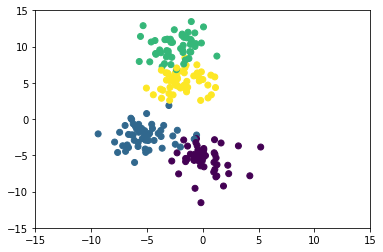

In [3]:
# creamos array para los data points
points = data[0]
# y generamos un scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

Disponemos de 4 clusters coloreados, algunos de ellos claramente diferenciados pero también se distingue solapamiento entre algunos de los clusters.

El primer paso en k-means es seleccionar centroides aleatorios. Dado que estamos trabajando sobre k=4 "blobs" (4 clusters), necesitaremos 4 centroides aleatorios.

### Inicialización de centroides

Podemos encontrarnos con la siguiente situación inicial

<img src="centroides_aleatorios.jpg" width="60%">

Y llegar a la siguiente situación final que no resultaría satisfactoria

<img src="resultado_centroides_aleatorios.jpg" width="60%">

Para mejorar la situación anterior surge Kmeans++ que tiene por objetivo hacer una selección mejorada de los centroides iniciales.

De una forma sencilla podríamos decir que si queremos seleccionar 2 centroides, en lugar de seleccionar ambos de forma aleatoria como se propone en Kmeans standard, seleccionaremos el primero aleatoriamente y luego miramos los puntos mas alejados de ese centroide que se supone que no perteneceran al cluster de ese centroide y asignaremos el segundo centroide próximo a esos puntos alejados.



### Como es la implementación de Kmeans en sklearn

Recordemos que para ejecutarlo, necesitamos importar Kmeans de `sklearn`:

In [9]:
from sklearn.cluster import KMeans

Observa que en la documentación se puede utilizar el parametro init='k-means++', pero que de hecho k-means++ es la inicialización del algoritmo por defecto, no necesitamos hacer cambios para poder ejecutar el algoritmo con esta opción mejorada. Tendríamos que indicarle especificamente 'random' para hacerlo con centroides aleatorios.

<img src="kmeans.gif" width="60%">

Ahora, ejecutemos k-means sobre nuestros datos (que pusimos en un array numpy que denominamos ‘points’).

In [10]:
# creamos objeto kmeans
kmeans = KMeans(n_clusters=4,init='k-means++')
# hacemos el ajuste del objeto kmeans a los datos
kmeans.fit(points)
# mostramos la localización de los clusters en el objeto kmeans
print(kmeans.cluster_centers_)
# salvamos los nuevos clusters para graficarlos
y_km = kmeans.fit_predict(points)

[[-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]]


In [11]:
# Recuperando los centroides
C = kmeans.cluster_centers_

Ya estamos en disposición de ver los resultados ejecutando el siguiente código en matplotlib.

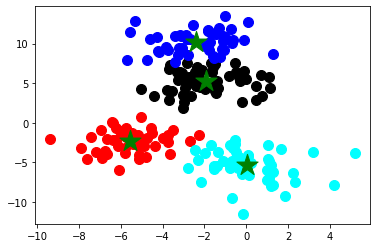

In [12]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(C[:, 0], C[:, 1], marker='*', c='green', s=500)
plt.show()

y ya lo tenemos! hemos diferenciado los 4 clusters. Observa que el algoritmo k-means++ ha hecho un mejor trabajo que k-means con los centroides mostrado en el ejemplo de mas arriba y practicamente tenemos ajustada a la perfección las fronteras de los clusters que creamos inicialmente.

* ¿Se te ocurren nuevas formas de inicializar los centroides?

Creamos un array de centroides iniciales

In [13]:
startcentroides=np.array([[4, 5],[-8, 10],[ 4, -5],[-5, -10]], np.float64)

Veamos donde hemos seleccionado esos centroides iniciales respecto de las nubes que formarán los clusters

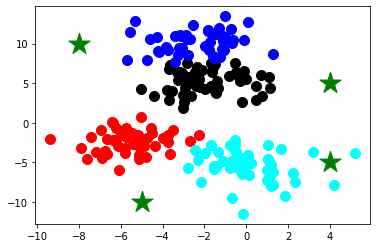

In [14]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(startcentroides[:, 0], startcentroides[:, 1], marker='*', c='green', s=500)
plt.show()

Creamos el objeto Kmeans indicándole en el parámetro init que seleccione los centroides inciales definidos por nosotros:

In [15]:
kmeans= KMeans(n_clusters=4, init=startcentroides, n_init=1)

# hacemos el ajuste del objeto kmeans a los datos
kmeans.fit(points)
# mostramos la localización de los clusters en el objeto kmeans
print(kmeans.cluster_centers_)


[[-1.92101646  5.21673484]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-5.56465793 -2.34988939]]


Y volvemos a dibujar los centroides finales

In [16]:
# Recuperando los centroides
C = kmeans.cluster_centers_

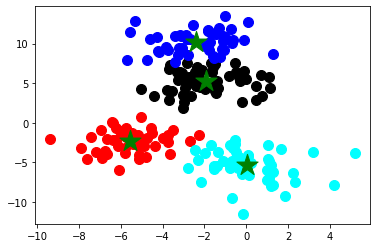

In [17]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(C[:, 0], C[:, 1], marker='*', c='green', s=500)
plt.show()

Recuerda que Kmeans (en sus diferentes variantes incluida Kmean++) es el algoritmo que se utiliza con mayor frecuencia debido a su rapidez y simplicidad de uso pero existen mas metodos de clusterización. Veamos a continuación otro metodo muy habitual que es el clustering jerárquico aglomerativo.

### Implementando Clustering Jerarquico Aglomerativo 

El método de clusterización jerárquico aglomerativo difiere de k-means en un elemento clave. En lugar de elegir previamente un número de clusters y empezar con una inicialización de los centroides de forma aleatoria, empezamos considerando en este método que cada punto de nuestro dataset es un “cluster.” A continuación localizamos los 2 puntos mas cercanos y los combinamos en un nuevo cluster. Entonces, localizamos los siguientes puntos mas cercanos y formamos un cluster. Repetimos el proceso hasta que solo tengamos un unico cluster gigante.

Durante el proceso de aplicación del algoritmo creamos un dendrograma, que refleja los pasos que ha ido realizando el algoritmo. A continuación puedes ver el dendrograma para los data points anteriores y puedes entender lo que ha ido sucediendo.

<img src="dendrograma.png" width="80%">

El dendrograma dibuja cada cluster y como se van generando en las diferentes etapas. Podemos utilizar el dendrograma para localizar los clusters para cualquier número que decidamos, desde 1 hasta el número total de puntos.
En el dendrograma mostrado podemos ver el primer cluster (azul), el segundo cluster (rojo), y el tercer cluster (verde). En este caso, solo aparecen pintados con código de colores los 3 primeros clusters, pero si miramos en la parte roja del dendrograma, podemos encontrar también el punto de inicio del 4º cluster. El dendrograma dispone de todo el camino hasta que cada uno de los puntos se convierte en su propio cluster individual.

Veamos como funciona el método de clusterización jerárquico aglomerativo  en Python.  

Lo primero de todo, necesitamos importar las librerías necesarias de scipy.cluster.hierarchy y sklearn.clustering.

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Creamos el dendrograma (que hemos mostrado mas arriba), determinamos cuantos clusters queremos, el metodo de creación y salvamos los clusters para graficarlos.

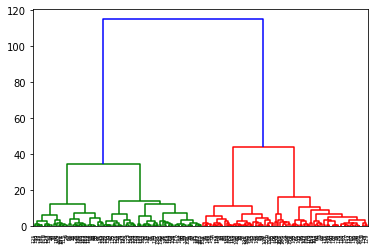

In [20]:
# creamos el dendrograma
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# creamos los clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# salvamos los clusters para graficarlos
y_hc = hc.fit_predict(points)

Y por último, haremos lo que ya hicimos con el algoritmo de K-means para ver los clusters graficados utilizando matplotlib.

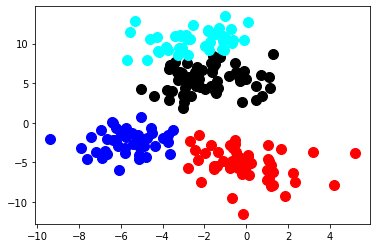

In [21]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

#### Comparativa Kmeans y agrupación jerárquica aglomerativa

En este caso, los resultados entre k-means y clusterización jerárquica son muy similares. Esto no siempre sucede así.
En general, la ventaja del metodo de clusterización jerárquico aglomerativo es que tiende a producir resultados mas precisos. Por contra, este método es mas difícil de implementar y consume mucho mas recursos/tiempo que el método k-means.

### DBSCAN (método basado en densidades) 

El agrupamiento espacial basado en densidad de aplicaciones con ruido o Density-based spatial clustering of applications with noise (DBSCAN) es un algoritmo de agrupamiento de datos basado en densidad (density-based clustering)


<img src="DBSCAN.gif" width="60%">

DBSCAN modela los clusters como cúmulos de alta densidad de puntos. Por lo cual, si un punto pertenece o no a un clúster, debe estar cerca de un montón de otros puntos de dicho clúster.
 
DBSCAN es uno de los algoritmos de agrupamiento más usados y citados en la literatura científica

Veamos como funciona el método DBSCAN en python.

Necesitamos importar las librerías necesarias sklearn.cluster y también incorporamos metrics para obtener algunas métricas sobre los resultados.

In [22]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

Necesitamos proporcionar tan solo 2 parametros clave al algoritmo DBSCAN

* min_samples: El número de muestras ( o peso total) en el entorno de un punto para ser considerado parte del core del punto, incluido el propio punto.
* eps: La distancia máxima considerada entre 2 muestras para pertenecer al mismo entorno.


Text(0, 0.5, 'Feature 1')

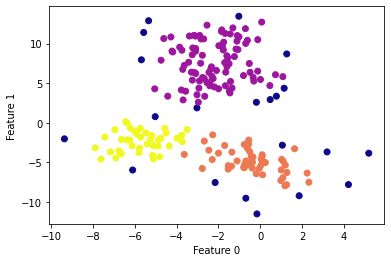

In [23]:
# clusterizamos los datos anteriores en 4 clusters
dbscan = DBSCAN(eps=1.5, min_samples = 10)
clusters = dbscan.fit_predict(points)
# graficamos las asignaciones de clusters
plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [18]:
labels = dbscan.labels_
# numero de clusters en etiquetas, ignorando el ruido presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de puntos ruidosos: %d' % n_noise_)
print("Homogeneidad: %0.3f" % metrics.homogeneity_score(data[1], labels))
print("Completitud: %0.3f" % metrics.completeness_score(data[1], labels))

Número estimado de clusters: 3
Número estimado de puntos ruidosos: 21
Homogeneidad: 0.598
Completitud: 0.659


#### Ventajas e inconvenientes de DBSCAN

* no necesita de la especificación del número de clusters como lo requiere k-means.
* puede encontrar clusters con formas geométricas arbitrarias. Puede incluso hallar un cluster completamente rodeado (pero no conectado) de otro cluster distinto.
* tiene noción del ruido, y es robusto detectando outliers.
* requiere solo de dos parámetros y no es susceptible al orden en que se encuentren los puntos dentro de la base de datos. 

Y como debilidades:  

* asume densidades similares en todos los clusters
* a veces tiene problemas en separar clusters

#### Algunas reflexiones
* ¿Qué aspectos consideras clave en la aplicación de clustering?
* ¿Como podrías aprovechar las ventajas de cada uno de los metodos que hemos visto? ¿Y como sortear los inconvenientes?
* ¿Qué aplicaciones se te ocurren?